<a href="https://colab.research.google.com/github/eeuunnjjiii/kagglestudy/blob/main/titanic/%5B2nd_kernel%5D_EDA_To_Prediction(DieTanic)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 : EDA To Prediction(DieTanic) (https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

# 캐글 데이터 연동

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"eunjijeong","key":"29fdf1c9b4bee7ef56c5520fc84d41dc"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


#1. Exploratory Data Analysis (EDA)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
data = pd.read_csv('train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How many Survived

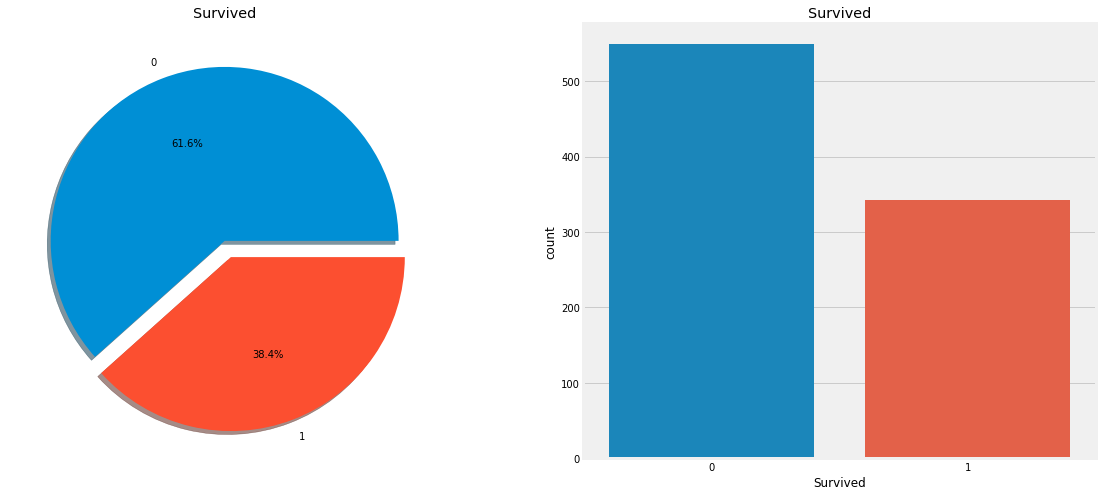

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Types of Features
- Categorical Features : 2개 혹은 그 이상으로 범주화된 변수 ex.Sex > Nominal Variables
- Ordinal Features : Categorical Feature와 비슷하지만 값에 순서가 있는 변수 ex.Pclass
- Continuous Feature : 두 개의 점 혹은 최소값과 최대값 사이의 값이 연속적인 변수 ex.Age

## Analysing The Features

In [9]:
# sex > Categorical Features
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

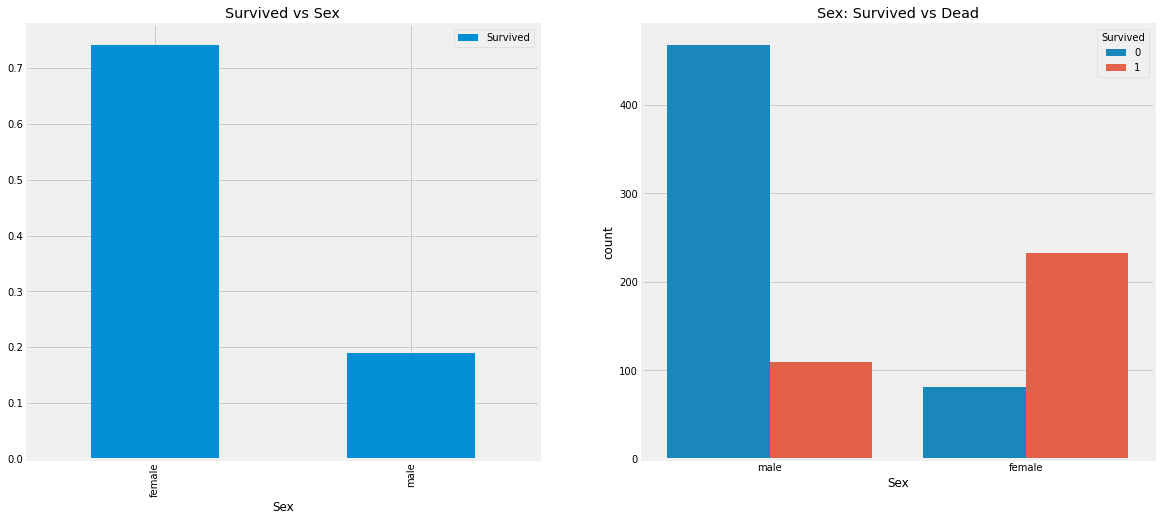

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 배에 탄 남성의 수는 여성의 수보다 훨씬 많지만, 여성이 남성에 비해 2배 넘게 생존
- Sex는 모델에 매우 중요한 변수가 될 것으로 보임

In [11]:
# Pclass > Ordinal Feature
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


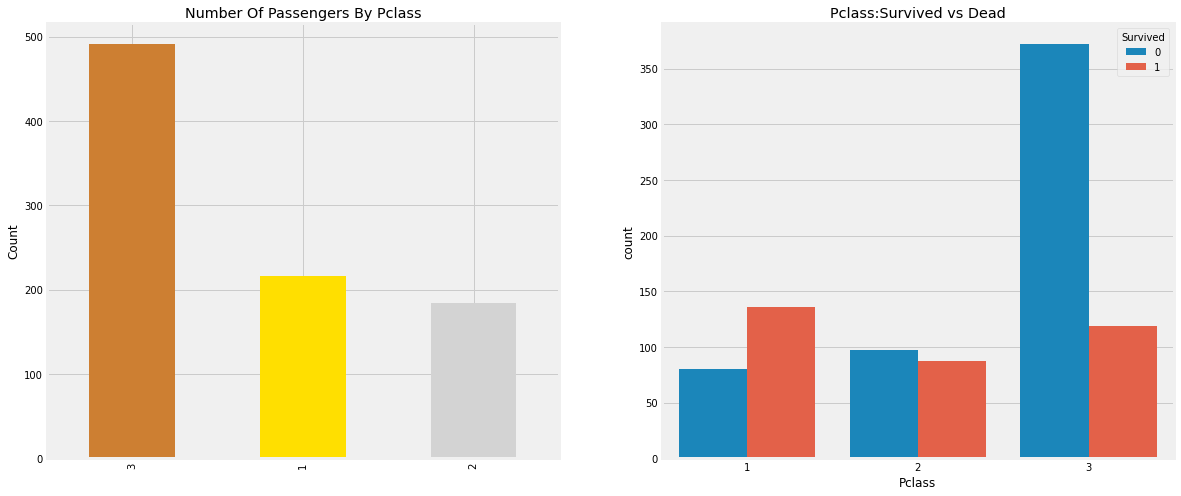

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- Pclass가 높으면 생존 확률이 높음

In [13]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

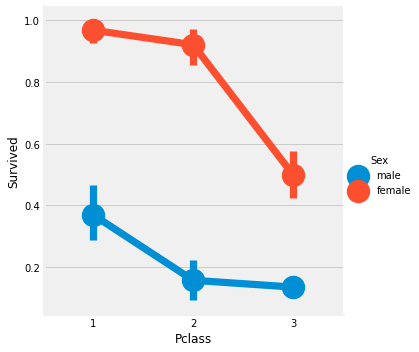

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

- categorical value를 분리해서 볼 수 있는 FactorPlot
- Pclass1 여성은 생존확률이 95-96%
- Pclass 또한 중요한 특성으로 보여짐

In [15]:
# Age > Continous Feature
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


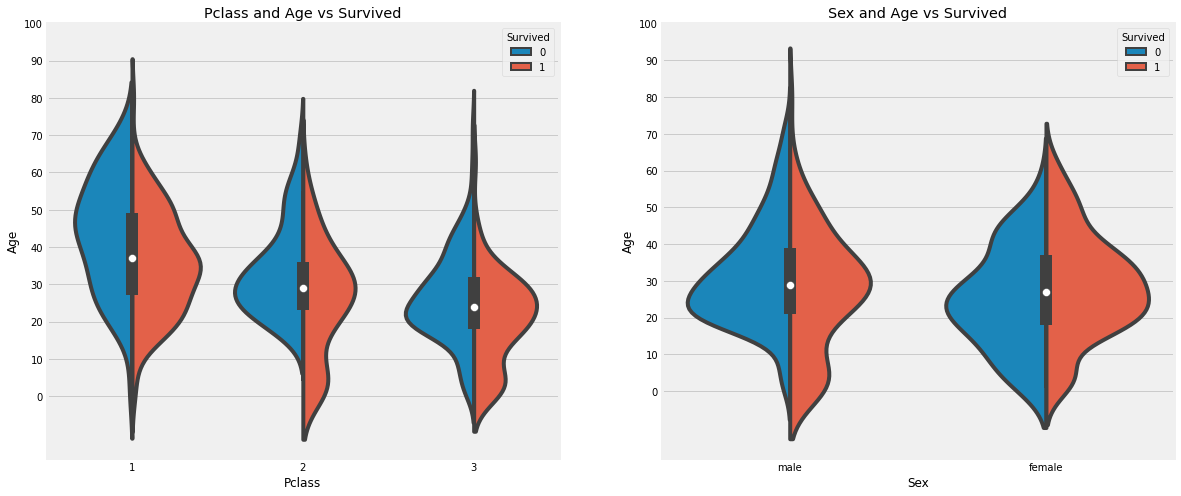

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- Pclass와 관계없이 10세 미만 어린이는 생존율이 높음
- Pclass 1의 20-50세 여성은 생존율이 높음
- 남성의 경우 나이가 많을수록 생존율이 줄어듦

In [17]:
# 나이 결측치를 이니셜에 따라 치환
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [18]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [19]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
# Initial 별 평균 나이 체크
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [21]:
# Age 결측치 채우기
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [22]:
data.Age.isnull().any()

False

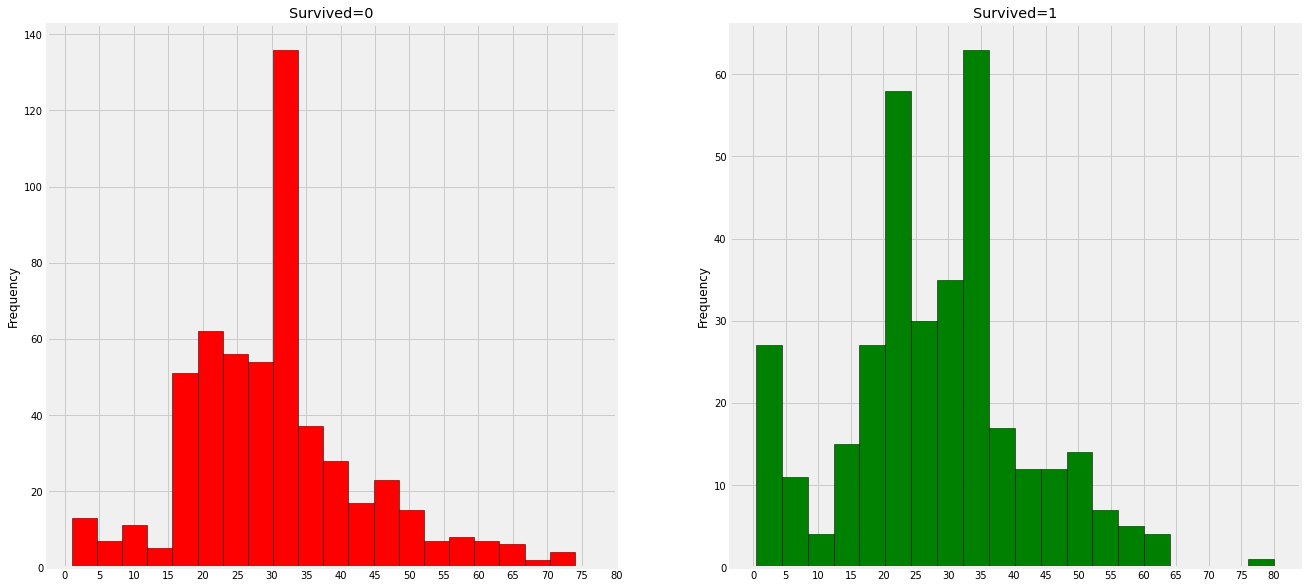

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

- 5세 이하 영아는 다수 생존 (여성과 아이 먼저 구조했기 때문)
- 가장 나이가 많은 80세 승객은 생존
- 가장 많이 죽은 나이 그룹은 30-40세

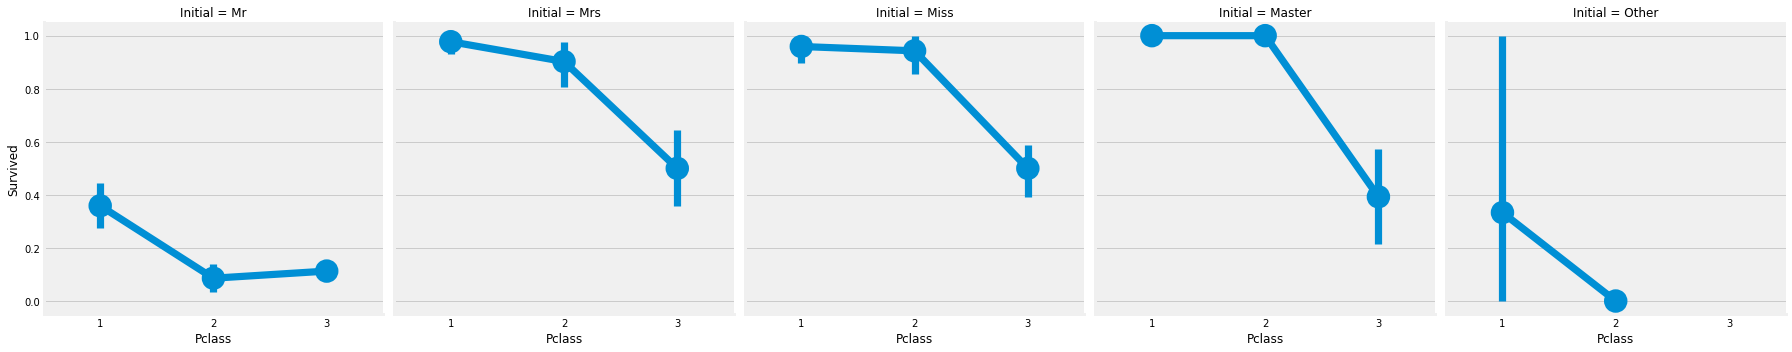

In [24]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

In [25]:
# Embarked > Categorical Value
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

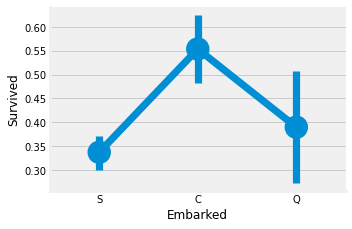

In [26]:
# Chances for Survival by Port Of Embarkation
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf() #get current figure
fig.set_size_inches(5, 3)
plt.show()

- C의 생존율이 가장 높고, S가 가장 낮음

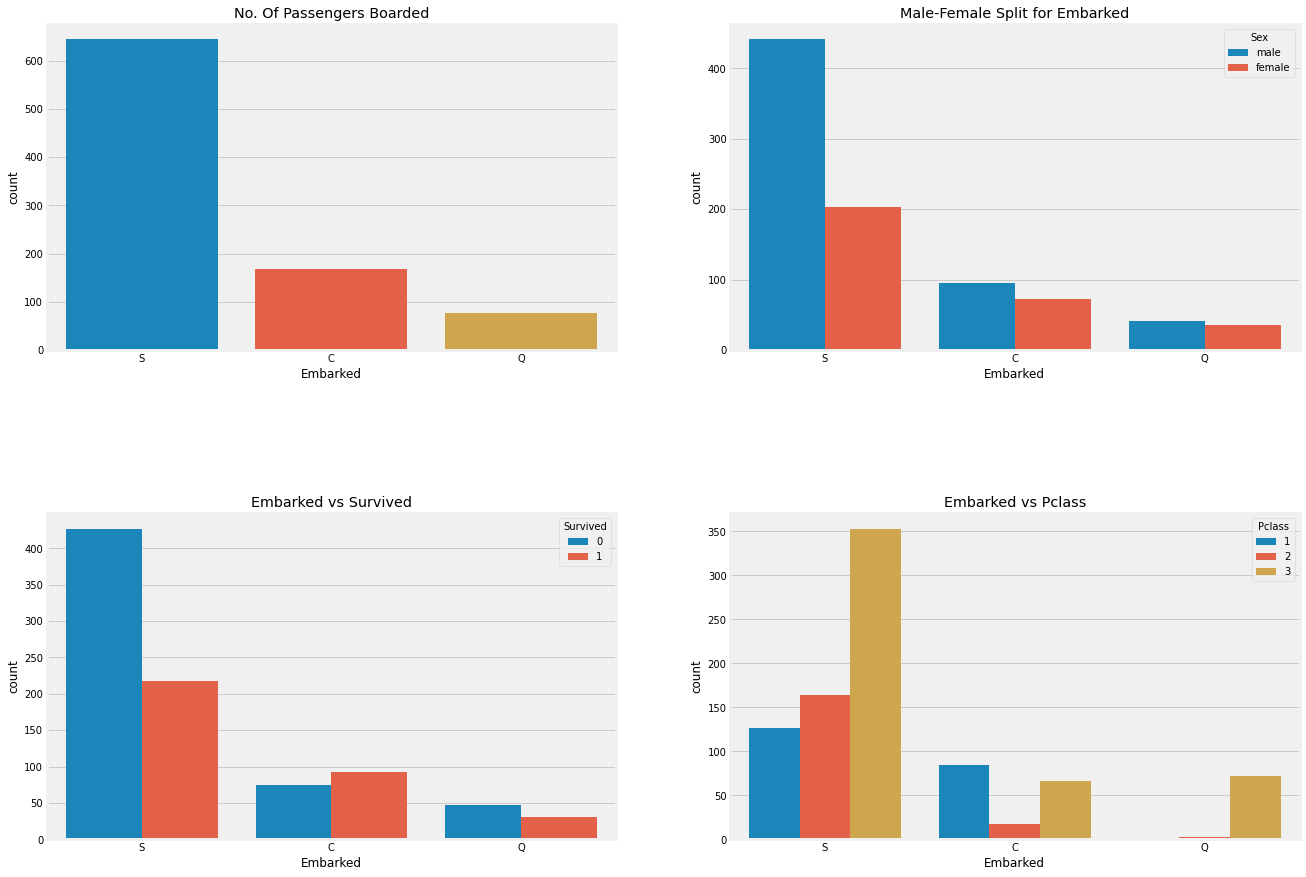

In [27]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- 가장 많은 승객이 S에서 탑승했으며, 3등급의 비율이 높음
- C의 생존율이 높은 이유는 Pclass 1, 2 승객이 많기 때문
- Q는 Pclass 3 승객이 95%

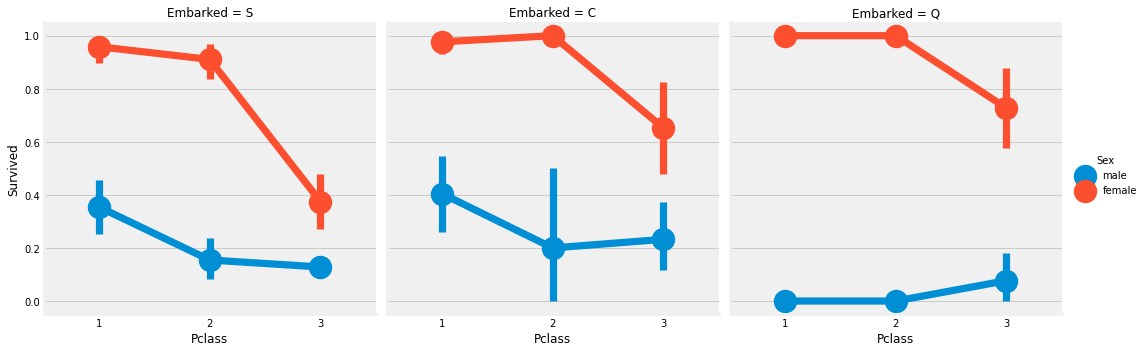

In [28]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

- Pclass 1과 2의 여성은 생존율이 1에 가까움
- S에서 탑승한 Pclass 3 승객은 성별에 관계없이 생존율이 낮음
- 대부분 Pclass가 3인 Q의 남성은 가장 불운하게 보임

In [29]:
# Embarked 결측치 채우기 > 다수의 승객이 S에서 탑승했으므로 S로 치환
data['Embarked'].fillna('S', inplace=True)

In [30]:
data.Embarked.isnull().any()

False

In [31]:
# SibSip > Discrete Feature
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


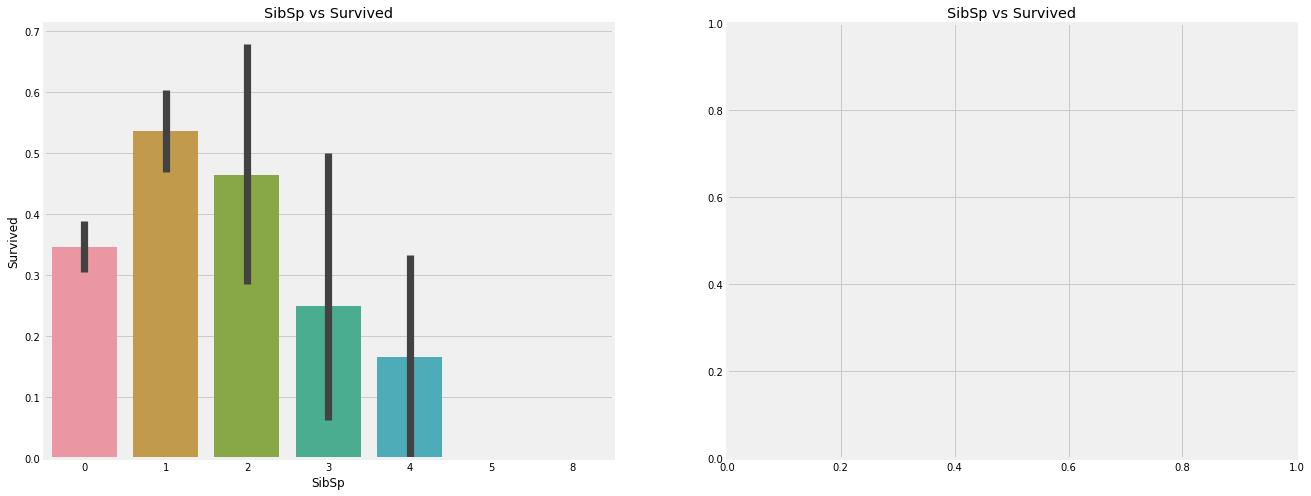

In [32]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [33]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 형제 자매가 없는 승객은 34.5% 생존율, 형제 자매 수가 늘수록 생존율이 낮아짐
- 형제 자매 수가 5-8인 승객의 생존율은 0 > Pclass가 3이었기 때문

In [34]:
# Parch
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- 대가족은 주로 Pclass 3에 위치

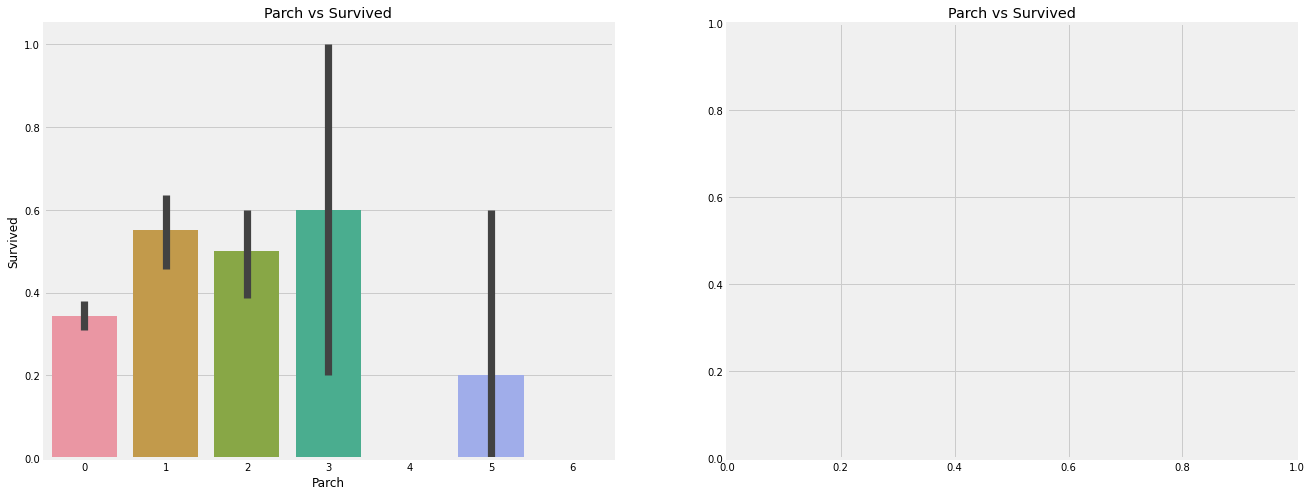

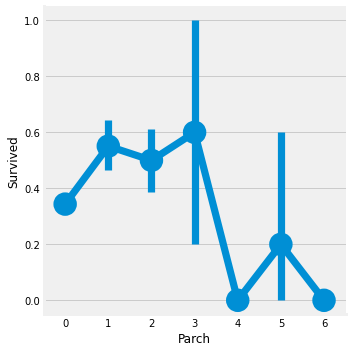

In [35]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

- 부모와 함께 탑승했을 경우 생존확률 높음, 하지만 숫자가 4 이상으로 증가할수록 생존율 줄어듦

In [36]:
# Fare > Continous Feature
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


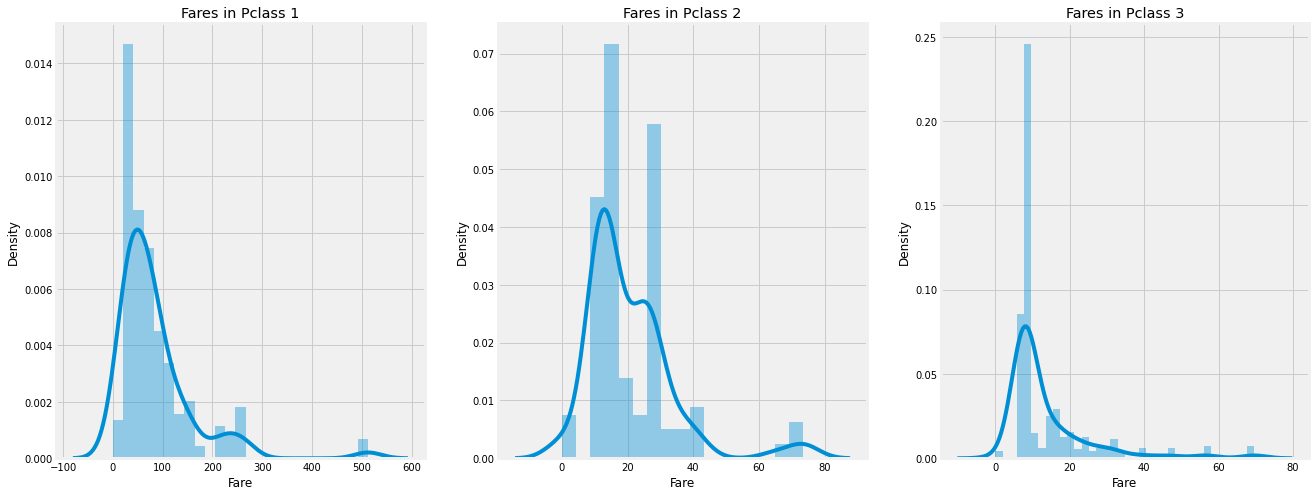

In [37]:
f,ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## Observations in a Nutshell for all features

- sex : 여성이 남성보다 생존율 높음
- Pclass : 1st class 승객이 생존율 높고, 3rd class 승객은 생존율 낮음
- Age : 5-10살 이하 어린이의 생존율 높음
- Embarked : C에서 탑승한 승객의 생존율 높음
- Parch+SibSp : 1-2명 형제자매나 1-3명 부모가 있을 경우 생존율 높음

##Correlation Between The Features

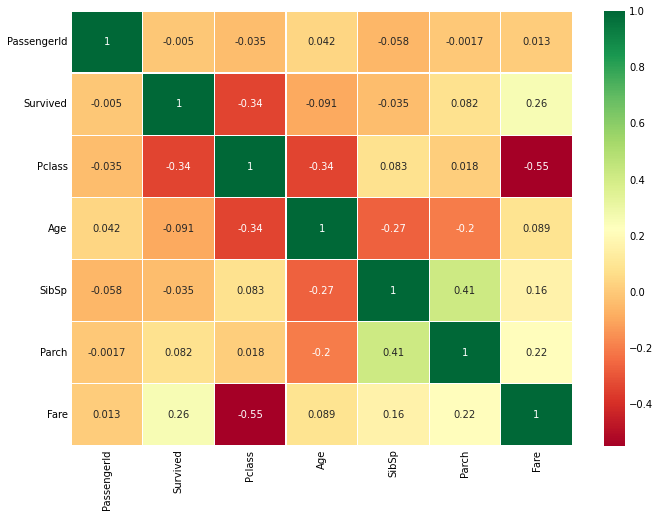

In [38]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

#2. Feature Engineering and Data Cleaning

- Feature Engineering : 중복되는 특성 등을 제거하고, 새로운 정보를 조합해 컬럼을 생성하는 것 ex.Initial

## Age_band

- Age는 연속변수이므로 범주화 적용 > 5개로 구간화

In [39]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [40]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


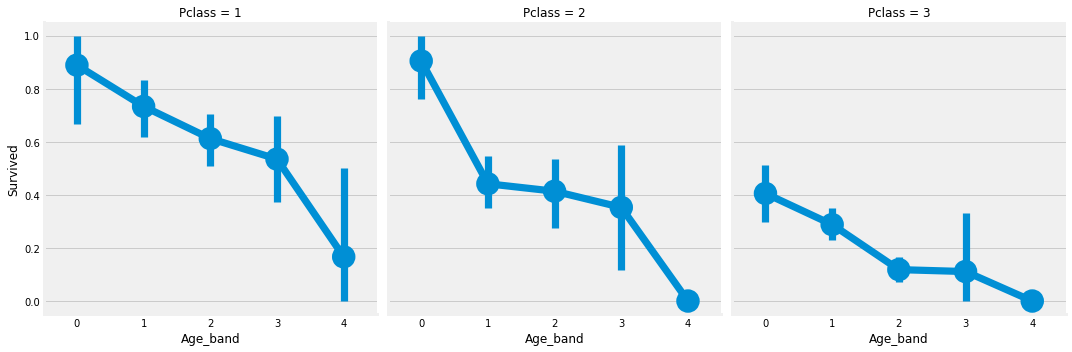

In [41]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

- Pclass에 관계없이 나이가 많을수록 생존율 낮음

##Family_Size and Alone

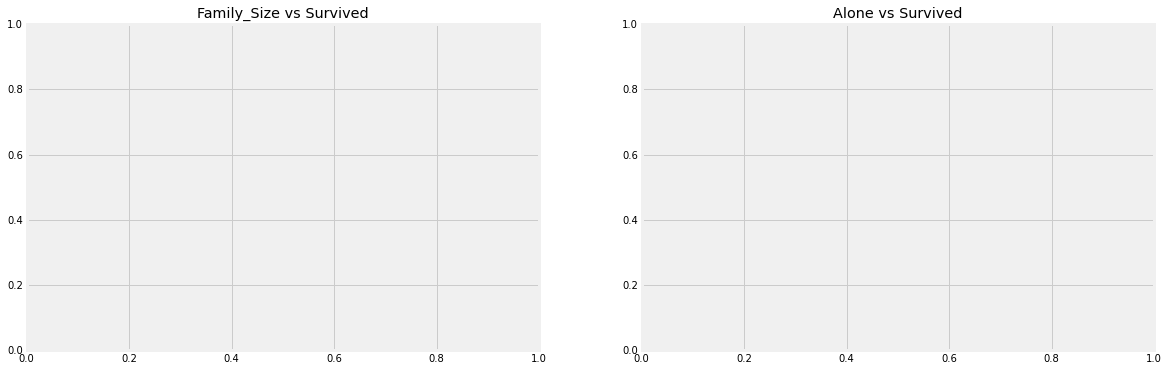

In [43]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

- 혼자일 때 생존율 낮음

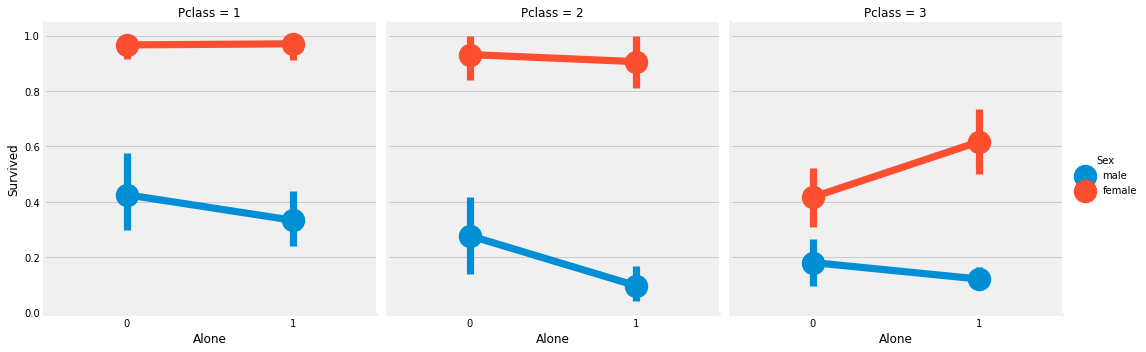

In [44]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

- Pclass 3 여성을 제외하고 모두 혼자일 때 생존율 낮음

##Fare_Range

- Fare 특성 또한 연속변수이기 때문에, 구간화

In [45]:
data['Fare_Range']=pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- Fare가 증가할수록 생존율도 증가

In [46]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat'] = 3

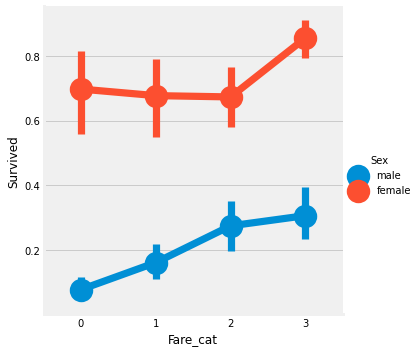

In [47]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

## Converting String Values into Numeric

In [48]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

## Dropping UnNeeded Features
- Name : 카테고리 변수로 변환 불가능
- Age : Age_band로 구간화 완료
- Ticket : random string
- Fare : Fare_cat으로 구간화 완료
- Cabin : NaN값 너무 많음
- Fare_Range : Fare_cat으로 구간화 완료
- PassengerId : 카테고리 변수로 변환 불가능

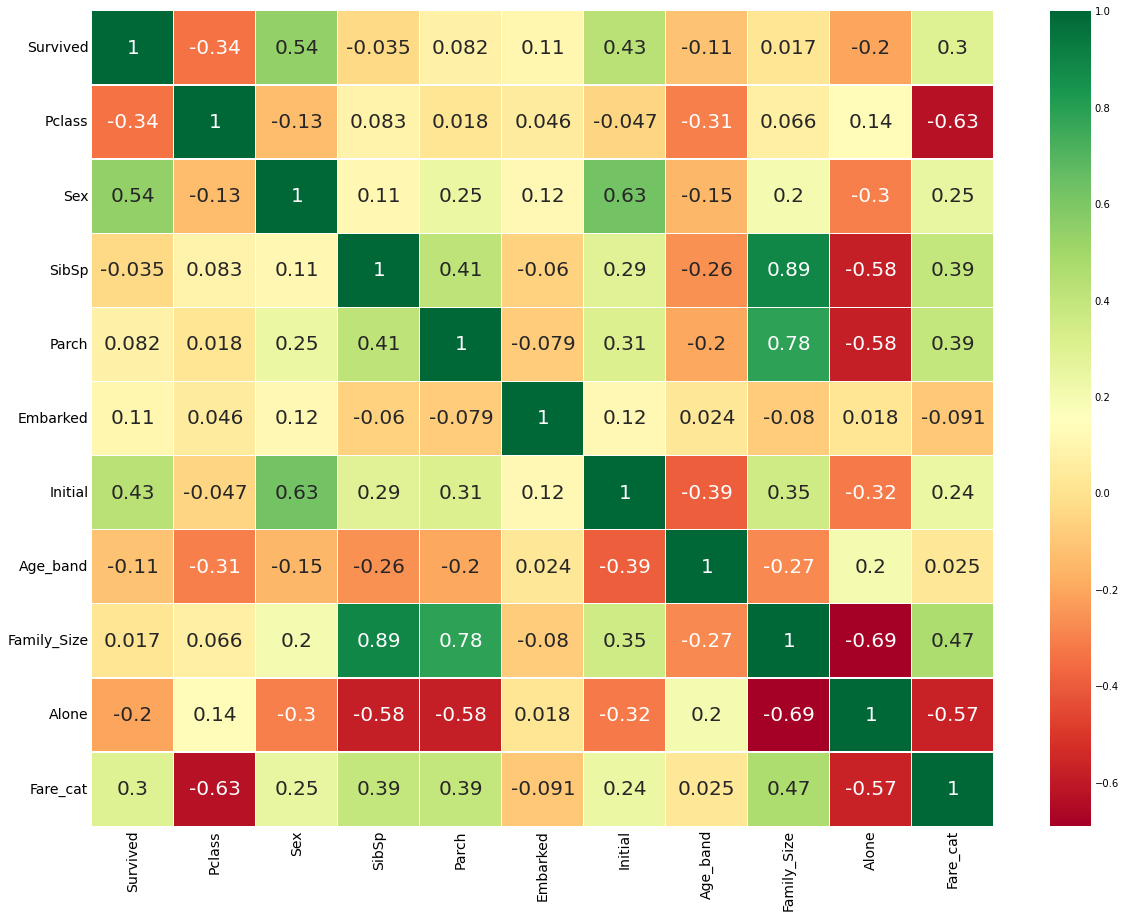

In [49]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 3. Predictive Modeling

In [52]:
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [53]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

## Radial Support Vector Machines(rbf-SVM)

In [54]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy of rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy of rbf SVM is  0.835820895522388


## Linear Suppoert Vector Machine(linear-SVM)

In [55]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy of linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy of linear SVM is  0.8171641791044776


## Logistic Regression

In [56]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

Accuracy of the Logistic Regression is  0.8134328358208955


## Decision Tree

In [57]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

Accuracy of the Decision Tree is  0.8022388059701493


## K-Nearest Neighbours(KNN)

In [58]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

Accuracy of the KNN is  0.832089552238806


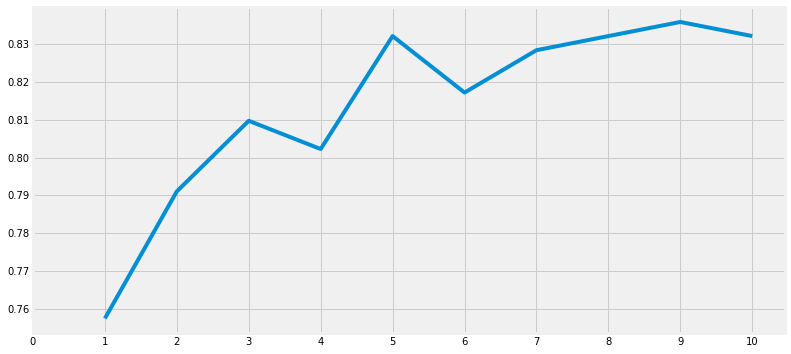

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [60]:
# K 변경
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

In [61]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

Accuracy of the NaiveBayes is  0.8134328358208955


## Random Forests

In [62]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy of the Random Forests is ', metrics.accuracy_score(prediction7, test_Y))

Accuracy of the Random Forests is  0.8208955223880597


## Cross Validation

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, random_state=22)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
  cv_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.809238,0.026757
Naive Bayes,0.801386,0.028999
Random Forest,0.815993,0.031441


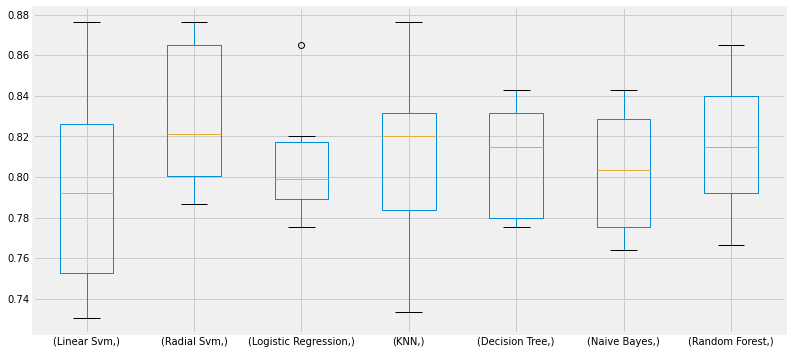

In [64]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

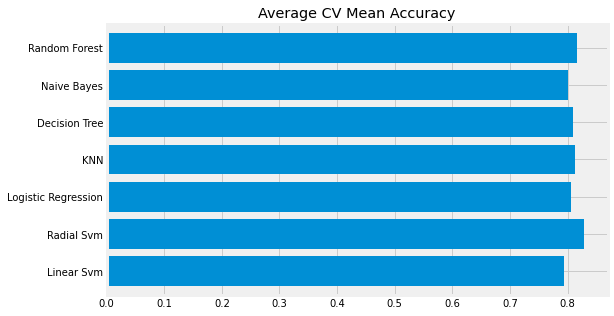

In [65]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

## Confusion Matrix

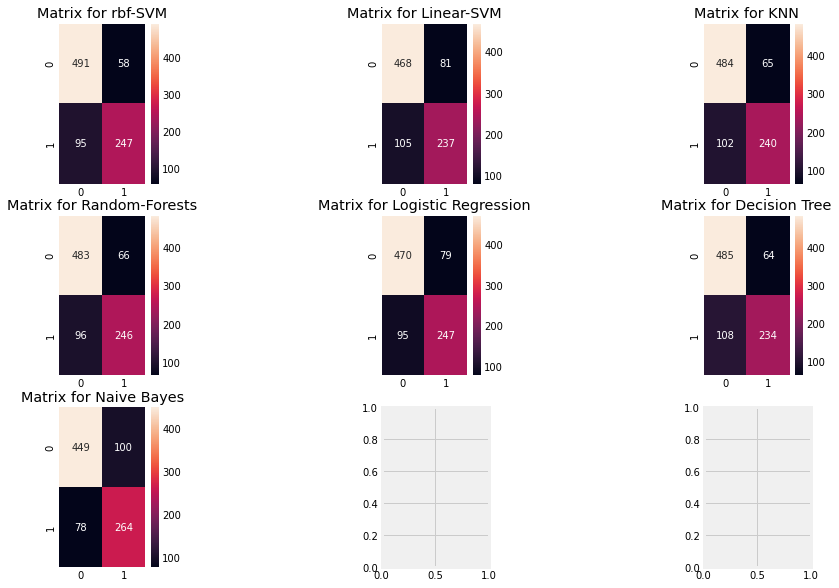

In [68]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=2.0)
plt.show()

- rbf-SVM은 사망자를 잘 예측하고, NaiveBayes는 생존자를 잘 예측함

## Hyper-Parameters Tuning

### SVM

In [70]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   22.3s finished


### Random Forests

In [71]:
n_estimators = range(100, 1000, 100) #트리개수 조절
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   39.4s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


## Ensembling

### Voting Classifier
- 가장 간단한 방법
- 모든 하위모델의 평균 예측 결과 기반
- 모든 하위모델이나 베이스모델은 모두 다른 타입

In [72]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)), 
                                                ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                            ], voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


### Bagging
- 작게 분할한 데이터로 비슷한 분류기를 만든뒤 모든 예측의 평균으로 결정 > 분산 감소
- voting과 달리 유사한 분류기를 사용한다는 차이점
- 분산이 큰 모델에 가장 잘 적용 > decision Tree, Random Forest

In [73]:
# KNN
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is', result.mean())

The accuracy for bagged KNN is 0.835820895522388
The cross validated score for bagged KNN is 0.8160424469413232


In [74]:
# Decision Tree
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is', result.mean())

The accuracy for bagged Decision Tree is 0.8246268656716418
The cross validated score for bagged Decision Tree is 0.8227590511860174


### Boosting
- 약한 모델을 가중치를 적용해 강화하는 방식

In [75]:
# AdaBoost(Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [76]:
# Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [77]:
# XGBoost
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


### Hyper-Parameter Tuning for AdaBoost

In [78]:
n_estimators = list(range(100, 1100, 100))
learning_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learning_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.7min finished


## Confusion Matrix for the Best Model

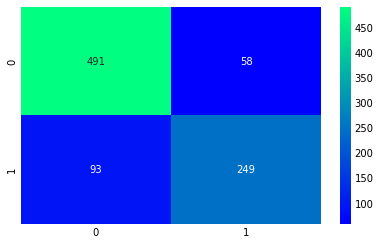

In [79]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## Feature Importance

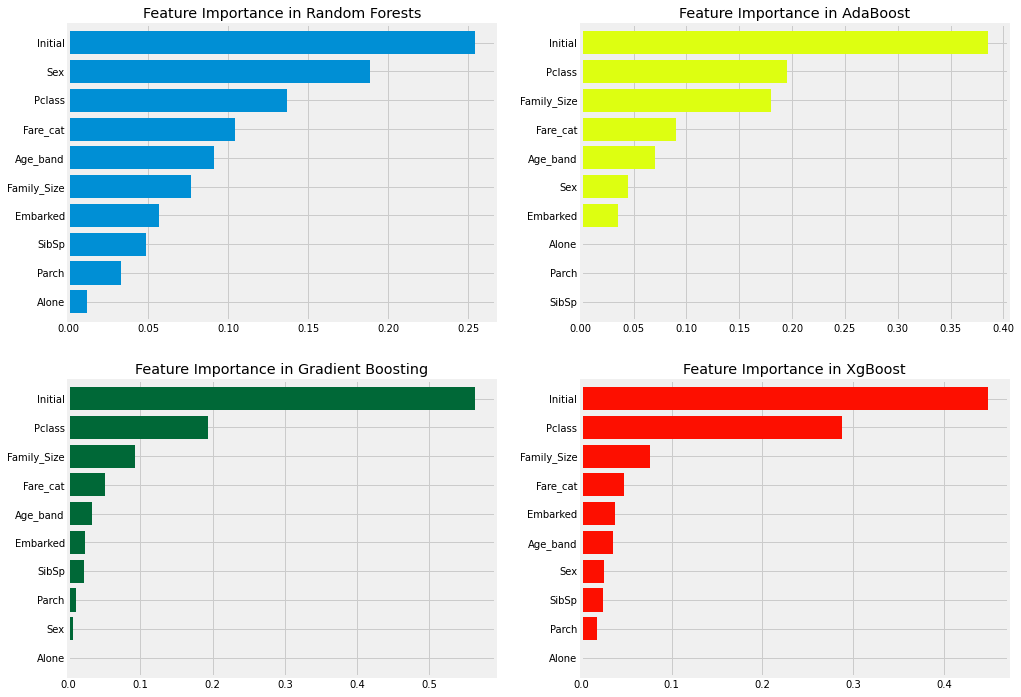

In [80]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')
plt.show()

- 모든 모델에서 공통적으로 중요한 특성 : Initial, Fare_cat, Pclass, Family_Size
- Sex 특성이 생각보다 중요하지 않은 결과 > Initial이 중요 특성으로 사용되었기 때문으로 판단됨